In [1]:
#Would repeat for other cell type

#Paths in /ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro
#/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro/240_predictions_MatrixStacked.tsv
#/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Astro/240_predictions_NamesList.txt

In [2]:
#Install libraries needed downstream

dir.create("~/R/library", recursive = TRUE)  # Create the directory if it doesn't exist
.libPaths("~/R/library")  # Set the library path
install.packages("ape")  # Now install the package
install.packages("BiocManager")
install.packages("phylolm");
BiocManager::install("ggtree")
BiocManager::install("phyloseq")


Warning message in dir.create("~/R/library", recursive = TRUE):
"'/Users/raehash/R/library' already exists"
Installing package into '/Users/raehash/R/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T//RtmpuGEhpL/downloaded_packages


Installing package into '/Users/raehash/R/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T//RtmpuGEhpL/downloaded_packages


Installing package into '/Users/raehash/R/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/2r/2m1p3nmd3m1235kf7dxs1cl40000gn/T//RtmpuGEhpL/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggtree'"
Old packages: 'bitops', 'data.table', 'dendextend', 'future.apply', 'ggfun',
  'glue', 'gtable', 'igraph', 'withr'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'phyloseq'"
Old packages: 'bitops', 'data.table', 'dendextend', 'future.apply', 'ggfun

In [2]:
library(ape)
library(ggtree)
library(phyloseq)
library(phylolm)
library(ggplot2)
library(dplyr)

ggtree v3.10.1 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56 


Attaching package: 'ggtree'


The followi

Step 1: Download and Read in Data

In [3]:
astrocytePredictionsPath <- "Astrocyte/240_predictions_MatrixStacked.tsv"
astrocytePredictions <- read.delim(astrocytePredictionsPath, header = FALSE, sep = "\t")
astrocytePredictionsNamesPath <- "Astrocyte/240_predictions_NamesList.txt"
astrocytePredictionsNames <- read.delim(astrocytePredictionsNamesPath, header = FALSE, sep = "\t")

In [4]:
vipPredictionsPath <- "VIP/240_predictions_MatrixStacked.tsv"
vipPredictions <- read.delim(vipPredictionsPath, header = FALSE, sep = "\t")
vipPredictionsNamesPath <- "VIP/240_predictions_NamesList.txt"
vipPredictionsNames <- read.delim(vipPredictionsNamesPath, header = FALSE, sep = "\t")

In [5]:
# Extract the species names from astrocytePredictionsNames and make them column names
species_names <- astrocytePredictionsNames[[1]]

# Check if the length matches the number of columns (excluding the first)
if (length(species_names) == (ncol(astrocytePredictions) - 1)) {
  
  # Rename the columns in astrocytePredictions (excluding the first column)
  colnames(astrocytePredictions)[2:ncol(astrocytePredictions)] <- species_names
  colnames(vipPredictions)[2:ncol(vipPredictions)] <- species_names
  
  # Print the new column names to verify
  #print(colnames(astrocytePredictions))
} else {
  stop("The number of species names does not match the number of columns in astrocytePredictions.")
}


In [6]:
# Transpose the astrocytePredictions data frame so species are rows and peaks are columns
astrocytePredictions <- t(astrocytePredictions)

# Convert it back to a data frame
astrocytePredictions <- as.data.frame(astrocytePredictions)

#Fix it so peaks are actually the column names
colnames(astrocytePredictions) <- astrocytePredictions[1, ]
astrocytePredictions <- astrocytePredictions[-1, ]

In [7]:
# Transpose the astrocytePredictions data frame so species are rows and peaks are columns
vipPredictions <- t(vipPredictions)

# Convert it back to a data frame
vipPredictions <- as.data.frame(vipPredictions)

#Fix it so peaks are actually the column names
colnames(vipPredictions) <- vipPredictions[1, ]
vipPredictions <- vipPredictions[-1, ]

In [8]:
common_columns <- intersect(names(astrocytePredictions), names(vipPredictions))
length(common_columns)

#astrocytePredictions <- astrocytePredictions[, common_columns, drop = FALSE]
#vipPredictions <- vipPredictions[, common_columns, drop = FALSE]

[1] 689

##### Processing: Remove the extra species from astrocytePredictions and astrocytePredictionsNames compared to Zoonomia data
##### Then, add column to astrocytePredictionsNames that has binary Homeotherm value.

In [9]:
#Load in original data to subset it --> added csv file to home directory of bridges ~___
originalZoonomiaData <- read.csv("Phenotypes_Zoonomia_3.csv", header = TRUE)
sortedZoonomia <- originalZoonomiaData[order(originalZoonomiaData$Name), ]

#Remove rows where Homeotherm value is NA
sortedZoonomia <- sortedZoonomia[!is.na(sortedZoonomia$Homeotherm), ]

# Step 1: Get the species names from sortedZoonomia
zoonomia_species <- sortedZoonomia$Name

In [10]:
astrocytePredictions <- astrocytePredictions[rownames(astrocytePredictions) %in% zoonomia_species, ]
astrocytePredictionsNames <- astrocytePredictionsNames[astrocytePredictionsNames$V1 %in% zoonomia_species, ]

#Need to convert the names back into a df
astrocytePredictionsNames <- data.frame(Species = astrocytePredictionsNames, stringsAsFactors = FALSE)

#Add homeotherm column
astrocytePredictionsNames$Homeotherm <- sortedZoonomia$Homeotherm

vipPredictions <- vipPredictions[rownames(vipPredictions) %in% zoonomia_species, ]
vipPredictionsNames <- vipPredictionsNames[vipPredictionsNames$V1 %in% zoonomia_species, ]

#Need to convert the names back into a df
vipPredictionsNames <- data.frame(Species = vipPredictionsNames, stringsAsFactors = FALSE)

#Add homeotherm column
vipPredictionsNames$Homeotherm <- sortedZoonomia$Homeotherm


2: Calculate difference in open chromatin between/across species of choice

Total number of species in the original tree: 241 
Number of species in the pruned tree: 163 


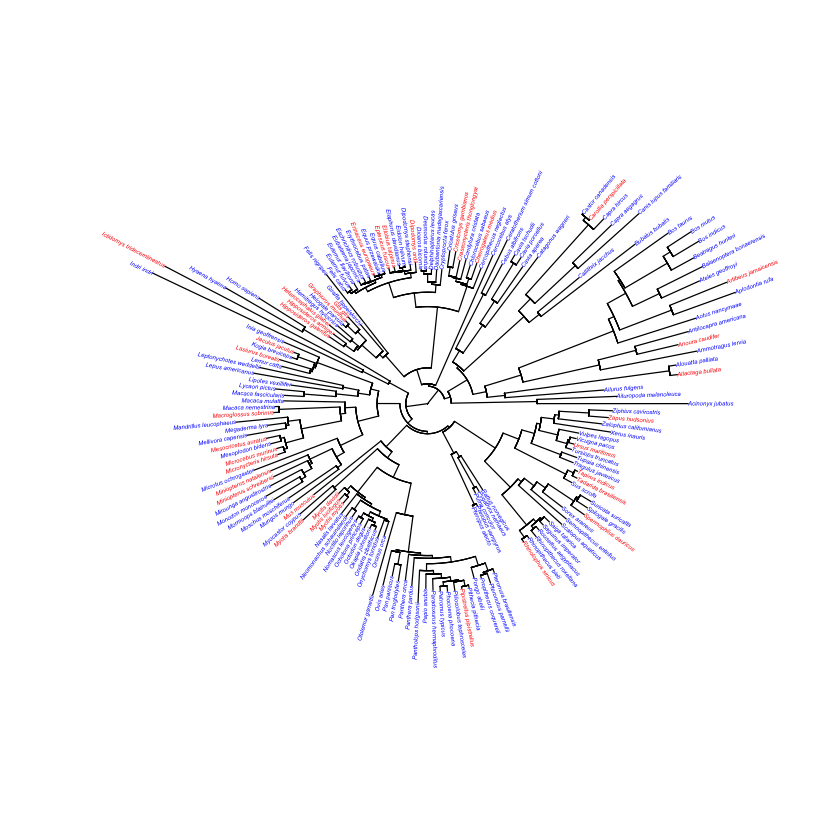

In [11]:
# Tree info - added tree file to ~ path

# Read the tree
tree <- read.tree("Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")
total_species <- length(tree$tip.label)
cat("Total number of species in the original tree:", total_species, "\n")

# Read the phenotypes data
pheno_df <- read.csv("Phenotypes_Zoonomia_3.csv")

# Create a subset of pheno_df to include only species with Homeotherm values
pheno_df_subset <- pheno_df[!is.na(pheno_df$Homeotherm), c("Homeotherm", "Species")]
rownames(pheno_df_subset) <- pheno_df_subset$Species
pheno_df_subset$Homeotherm <- factor(pheno_df_subset$Homeotherm)

# Trim whitespace from species names
tree$tip.label <- trimws(tree$tip.label)
pheno_df_subset$Species <- trimws(pheno_df_subset$Species)

# Identify species in pheno_df_subset that are not in the tree
species_not_in_tree <- setdiff(pheno_df_subset$Species, tree$tip.label)

# Remove species not present in the tree
remove_species <- setdiff(tree$tip.label, pheno_df_subset$Species)
pruned_tree <- drop.tip(tree, remove_species)
pruned_tree$tip.label <- sort(pruned_tree$tip.label)


# Print the number of species in the pruned tree
num_species_pruned <- length(pruned_tree$tip.label)
cat("Number of species in the pruned tree:", num_species_pruned, "\n")

# Prepare tip colors based on Homeotherm factor
useTipColorsV <- c("red", "blue")
tipColorsV <- useTipColorsV[pheno_df_subset[pruned_tree$tip.label, "Homeotherm"]]

# Plot the pruned tree
plot(pruned_tree, type = "fan", cex = 0.3, tip.color = tipColorsV)


In [12]:
vector_to_remove <- c('Balaenoptera_acutorostrata', 'Bison_bison', 'Cebus_capucinus', 'Colobus_angolensis', 'Dicerorhinus_sumatrensis', 'Equus_asinus',
                     'Gorilla_gorilla', 'Marmota_marmota', 'Neophocaena_asiaeorientalis', 'Oryctolagus_cuniculus', 'Ovis_canadensis', 'Panthera_tigris',
                     'Perognathus_longimembris', 'Peromyscus_maniculatus', 'Saimiri_boliviensis')


In [13]:
astrocytePredictionsNames = astrocytePredictionsNames[-(which(astrocytePredictionsNames$Species %in% vector_to_remove)),]
astrocytePredictions = astrocytePredictions[-(which(rownames(astrocytePredictions) %in% vector_to_remove)),]

In [14]:
vipPredictionsNames = vipPredictionsNames[-(which(vipPredictionsNames$Species %in% vector_to_remove)),]
vipPredictions = vipPredictions[-(which(rownames(vipPredictions) %in% vector_to_remove)),]

**Phylolm**

In [39]:
testPeaksV <- colnames(astrocytePredictions)

loopPeaksV <- testPeaksV[1:689]

peakPhyloResultsF <- data.frame(peakId = loopPeaksV, pvalue=rep(NA,length(loopPeaksV)),correlation=rep(NA,length(loopPeaksV)),adjCorrelation=rep(NA,length(loopPeaksV)))
rownames(peakPhyloResultsF) <- peakPhyloResultsF$peakId
options(warn=-1)
for(curPeak in loopPeaksV) {
    speciesDetailedInfoTmpF <- astrocytePredictionsNames
    matching_order <- match(pruned_tree$tip.label, speciesDetailedInfoTmpF$Species)
    
    speciesDetailedInfoTmpF <- speciesDetailedInfoTmpF[matching_order, ]
    astrocytePredictions <- astrocytePredictions[matching_order, ]
    
    speciesDetailedInfoTmpF$curPeak <- astrocytePredictions[, curPeak]
    speciesDetailedInfoTmpF$curPeak <- as.numeric(speciesDetailedInfoTmpF$curPeak)
    
    
    rownames(speciesDetailedInfoTmpF) <- NULL
    rownames(speciesDetailedInfoTmpF) = speciesDetailedInfoTmpF$Species

    # Perform the phylogenetic regression
    curLmFit = phylolm(curPeak ~ Homeotherm, data=speciesDetailedInfoTmpF, phy=pruned_tree, model="BM")
    curLmFitSum <- summary(curLmFit)
    
    peakPhyloResultsF[curPeak, "pvalue"] <- curLmFitSum$coefficients["Homeotherm", "p.value"]
    peakPhyloResultsF[curPeak, "correlation"] <- curLmFitSum$r.squared
    peakPhyloResultsF[curPeak, "adjCorrelation"] <- curLmFitSum$adj.r.squared
}
options(warn=0)
file_name <- sprintf("Peak_Phylolm/peakPhyloResults_astrocyte.csv", start_index, slice_indices[i])
write.csv(peakPhyloResultsF, file = file_name, row.names = FALSE)
flush.console()
Sys.sleep(1)



ERROR: Error in phylolm(curPeak ~ Homeotherm, data = speciesDetailedInfoTmpF, : could not find function "phylolm"


In [40]:
testPeaksV <- colnames(vipPredictions)

loopPeaksV <- testPeaksV[1:689]

peakPhyloResultsF <- data.frame(peakId = loopPeaksV, pvalue=rep(NA,length(loopPeaksV)),correlation=rep(NA,length(loopPeaksV)),adjCorrelation=rep(NA,length(loopPeaksV)))
rownames(peakPhyloResultsF) <- peakPhyloResultsF$peakId
options(warn=-1)
for(curPeak in loopPeaksV) {
    speciesDetailedInfoTmpF <- vipPredictionsNames
    matching_order <- match(pruned_tree$tip.label, speciesDetailedInfoTmpF$Species)
    
    speciesDetailedInfoTmpF <- speciesDetailedInfoTmpF[matching_order, ]
    vipPredictions <- vipPredictions[matching_order, ]
    
    speciesDetailedInfoTmpF$curPeak <- vipPredictions[, curPeak]
    speciesDetailedInfoTmpF$curPeak <- as.numeric(speciesDetailedInfoTmpF$curPeak)
    
    
    rownames(speciesDetailedInfoTmpF) <- NULL
    rownames(speciesDetailedInfoTmpF) = speciesDetailedInfoTmpF$Species

    # Perform the phylogenetic regression
    curLmFit = phylolm(curPeak ~ Homeotherm, data=speciesDetailedInfoTmpF, phy=pruned_tree, model="BM")
    curLmFitSum <- summary(curLmFit)
    
    peakPhyloResultsF[curPeak, "pvalue"] <- curLmFitSum$coefficients["Homeotherm", "p.value"]
    peakPhyloResultsF[curPeak, "correlation"] <- curLmFitSum$r.squared
    peakPhyloResultsF[curPeak, "adjCorrelation"] <- curLmFitSum$adj.r.squared
}
options(warn=0)
file_name <- sprintf("Peak_Phylolm/peakPhyloResults_vip.csv", start_index, slice_indices[i])
write.csv(peakPhyloResultsF, file = file_name, row.names = FALSE)
flush.console()
Sys.sleep(1)

ERROR: Error in phylolm(curPeak ~ Homeotherm, data = speciesDetailedInfoTmpF, : could not find function "phylolm"


**Visualization**

In [15]:
astrocyte_10000 <- read.csv("Peak_Phylolm/peakPhyloResults_astrocyte.csv")
astrocyte_overlap <- read.csv("Peak_Phylolm/peakPhyloResults_astrocyte_common.csv")
vip_10000 <- read.csv("Peak_Phylolm/peakPhyloResults_vip.csv")
vip_overlap <- read.csv("Peak_Phylolm/peakPhyloResults_vip_common.csv")

In [20]:
astrocyte_overlap_filtered <- astrocyte_overlap[!astrocyte_overlap$peakId %in% astrocyte_10000$peakId, ]
vip_overlap_filtered <- vip_overlap[!vip_overlap$peakId %in% vip_10000$peakId, ]

astrocyte_combined <- rbind(astrocyte_10000, astrocyte_overlap_filtered)
vip_combined <- rbind(vip_10000, vip_overlap_filtered)

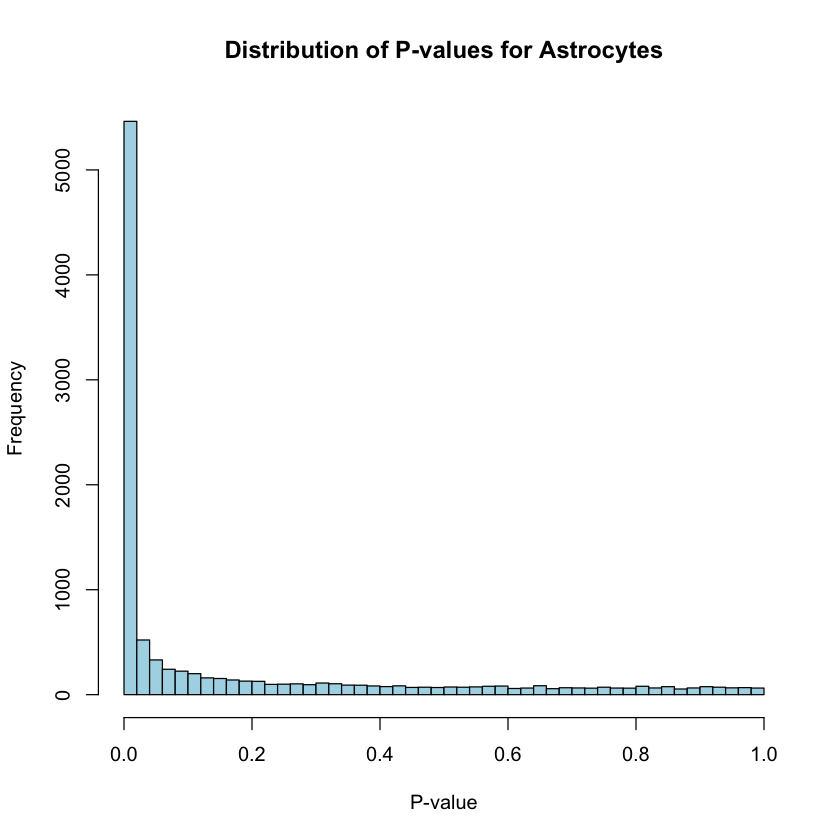

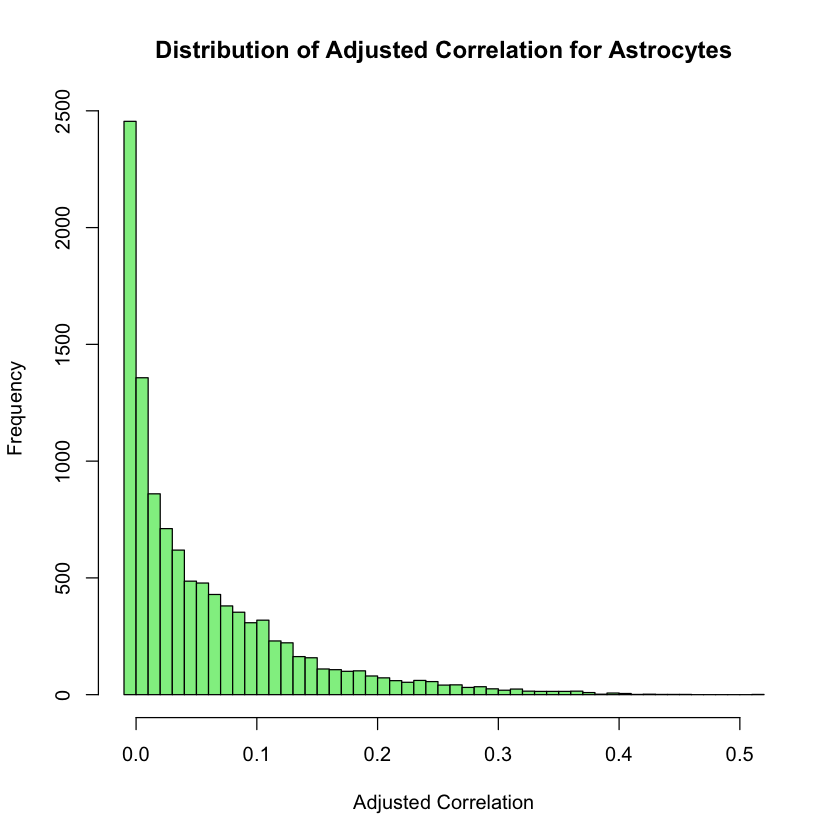

In [21]:
#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(astrocyte_combined$pvalue, breaks=50, main="Distribution of P-values for Astrocytes", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(astrocyte_combined$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for Astrocytes", xlab="Adjusted Correlation", col="lightgreen")

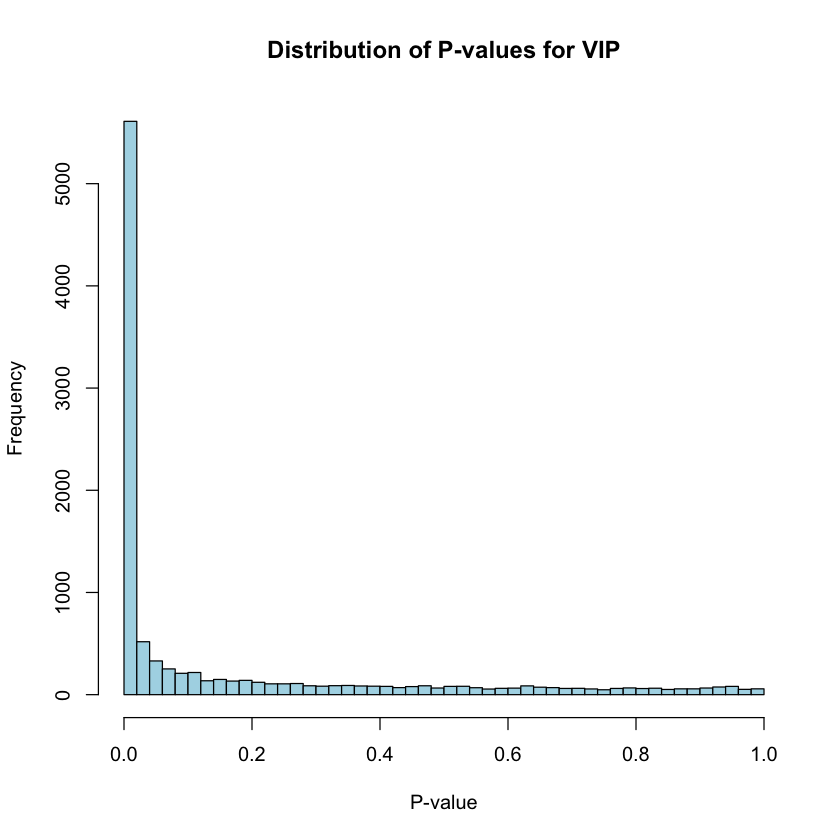

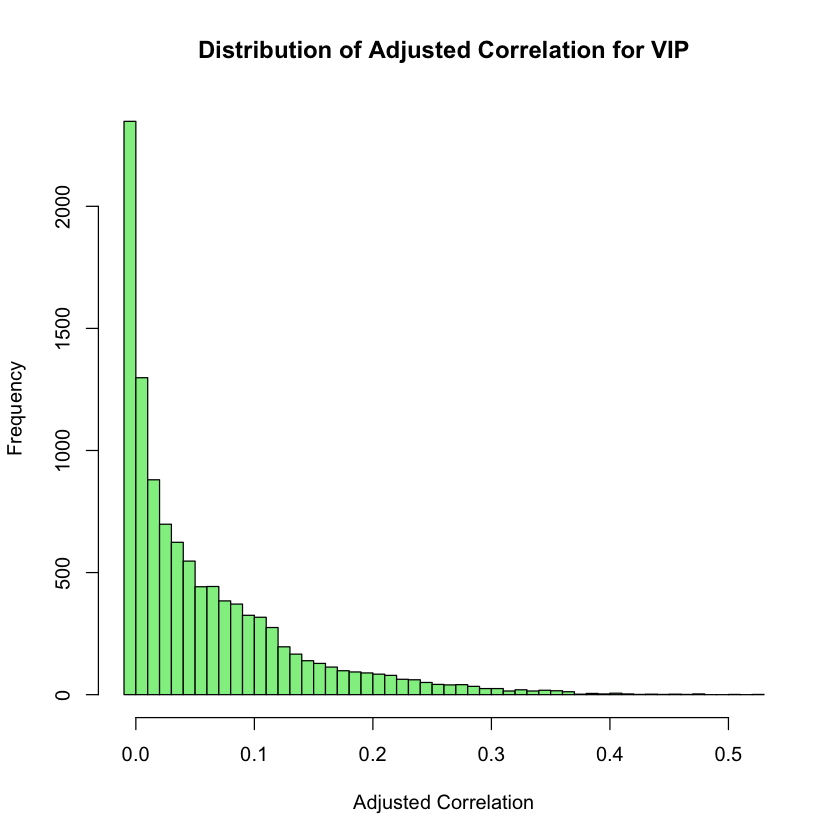

In [22]:
#Plot histogram of distribution of values for both measures (p-val and magnitude/direction)

# P-value Histogram
hist(vip_combined$pvalue, breaks=50, main="Distribution of P-values for VIP", xlab="P-value", col="lightblue")

# Adjusted Correlation Histogram
hist(vip_combined$adjCorrelation, breaks=50, main="Distribution of Adjusted Correlation for VIP", xlab="Adjusted Correlation", col="lightgreen")

In [25]:
astrocyte_combined$adjusted_pvalue <- p.adjust(astrocyte_combined$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(astrocyte_combined$adjusted_pvalue <= 0.1 & astrocyte_combined$adjCorrelation > 0)
sig_neg <- sum(astrocyte_combined$adjusted_pvalue <= 0.1 & astrocyte_combined$adjCorrelation < 0)

cat("Significantly positively associated regions Astrocyte:", sig_pos, "\n")
cat("Significantly negatively associated regions Astrocyte:", sig_neg, "\n")

Significantly positively associated regions Astrocyte: 6304 
Significantly negatively associated regions Astrocyte: 0 


In [26]:
#Performing p-value correction for multiple hypotheses

# Apply FDR correction - Bonferroni
vip_combined$adjusted_pvalue <- p.adjust(vip_combined$pvalue, method = "BH")

# Count significant regions at adjusted p-value <= 0.1
sig_pos <- sum(vip_combined$adjusted_pvalue <= 0.1 & vip_combined$adjCorrelation > 0)
sig_neg <- sum(vip_combined$adjusted_pvalue <= 0.1 & vip_combined$adjCorrelation < 0)

cat("Significantly positively associated regions VIP:", sig_pos, "\n")
cat("Significantly negatively associated regions VIP:", sig_neg, "\n")


Significantly positively associated regions VIP: 6468 
Significantly negatively associated regions VIP: 0 


In [27]:
# For homeotherm species print peak value
homeotherm_species <- astrocytePredictionsNames$Species[astrocytePredictionsNames$Homeotherm == 1]
nonhomeotherm_species <- astrocytePredictionsNames$Species[astrocytePredictionsNames$Homeotherm == 0]

In [28]:
# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- astrocyte_combined[astrocyte_combined$adjCorrelation > 0, ]
negative_adj_corr <- astrocyte_combined[astrocyte_combined$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak Astrocyte:")
print(most_pos_assoc_peak)

print("Most negatively associated peak Astrocyte:")
print(most_neg_assoc_peak)

[1] "Most positively associated peak Astrocyte:"
                                  peakId       pvalue correlation
3673 rheMac10:chr1:32874720-32875220:250 1.311976e-27   0.5221717
     adjCorrelation adjusted_pvalue
3673      0.5192038    1.396861e-23


[1] "Most negatively associated peak Astrocyte:"
                                  peakId    pvalue correlation adjCorrelation
357 rheMac10:chr18:68132752-68133252:250 0.3189054 0.006170442  -2.412422e-06
    adjusted_pvalue
357       0.4144167


In [29]:
astrocyte_peaks <- c(most_pos_assoc_peak$peakId, most_neg_assoc_peak$peakId)

Warning message:
"Removed 30 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 27 rows containing missing values or values outside the scale range
(`geom_point()`)."


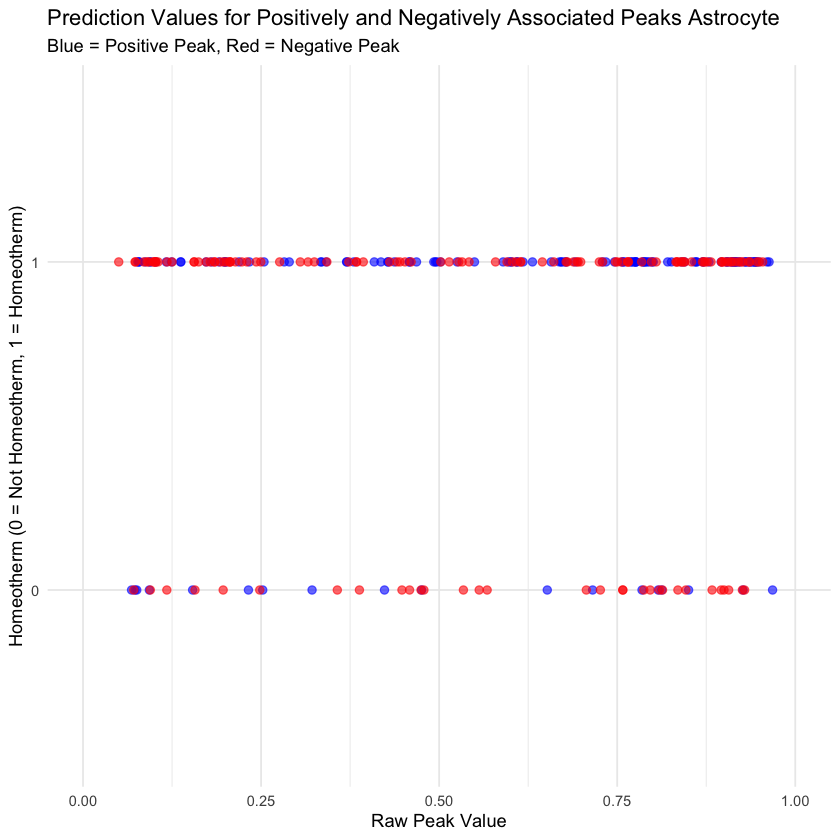

In [30]:
indices <- match(astrocyte_peaks, colnames(astrocytePredictions))
subset_astrocyte <- astrocytePredictions[,indices]
subset_astrocyte$Homeotherm <- astrocytePredictionsNames$Homeotherm

colnames(subset_astrocyte) <- c("Positive_Peak", "Negative_Peak", "Homeotherm")
subset_astrocyte$Homeotherm <- as.factor(subset_astrocyte$Homeotherm)
subset_astrocyte$Positive_Peak <- as.numeric(subset_astrocyte$Positive_Peak)
subset_astrocyte$Negative_Peak <- as.numeric(subset_astrocyte$Negative_Peak)

plot <- ggplot(subset_astrocyte, aes(x = Positive_Peak, y = Homeotherm)) +
  geom_point(color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(x = Negative_Peak), color = "red", alpha = 0.6, size = 2) +
  scale_x_continuous(limits = c(0, 1), name = "Raw Peak Value") +
  scale_y_discrete(name = "Homeotherm (0 = Not Homeotherm, 1 = Homeotherm)") +
  labs(title = "Prediction Values for Positively and Negatively Associated Peaks Astrocyte",
       subtitle = "Blue = Positive Peak, Red = Negative Peak") +
  theme_minimal()

print(plot)

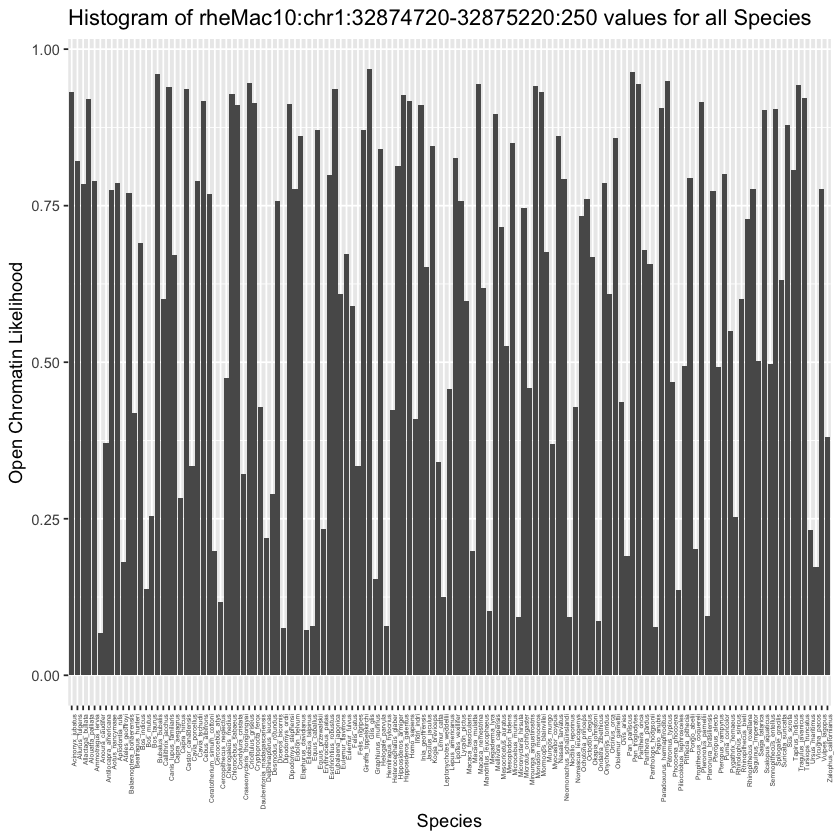

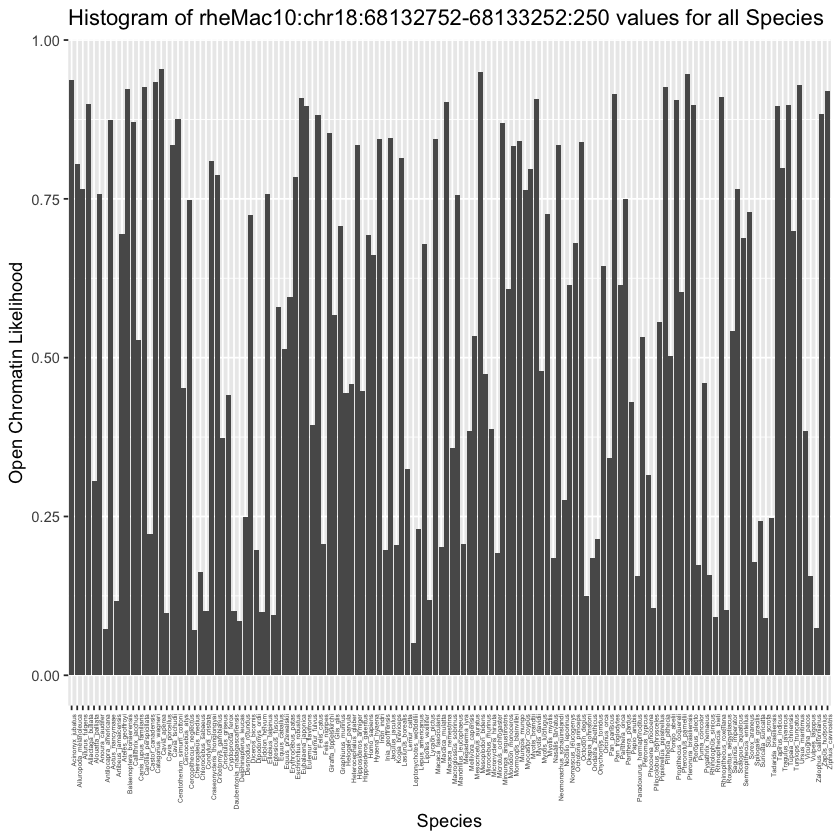

In [57]:
# For specific peak print magnitude across all species
for (peak in astrocyte_peaks){
    idx <- match(peak, colnames(astrocytePredictions))
    small_astrocytePredictions <- astrocytePredictions[idx]
    small_astrocytePredictions$Species <- rownames(small_astrocytePredictions)
    colnames(small_astrocytePredictions) <- c("Value", "Species")
    small_astrocytePredictions$Value <- as.numeric(small_astrocytePredictions$Value)
    small_astrocytePredictions <- small_astrocytePredictions[small_astrocytePredictions$Value >= 0,]
    my_plot <- ggplot(small_astrocytePredictions, aes(x = Species, y = Value)) +
                geom_bar(stat = "identity") +
                theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for all Species"))
    print(my_plot)    
}


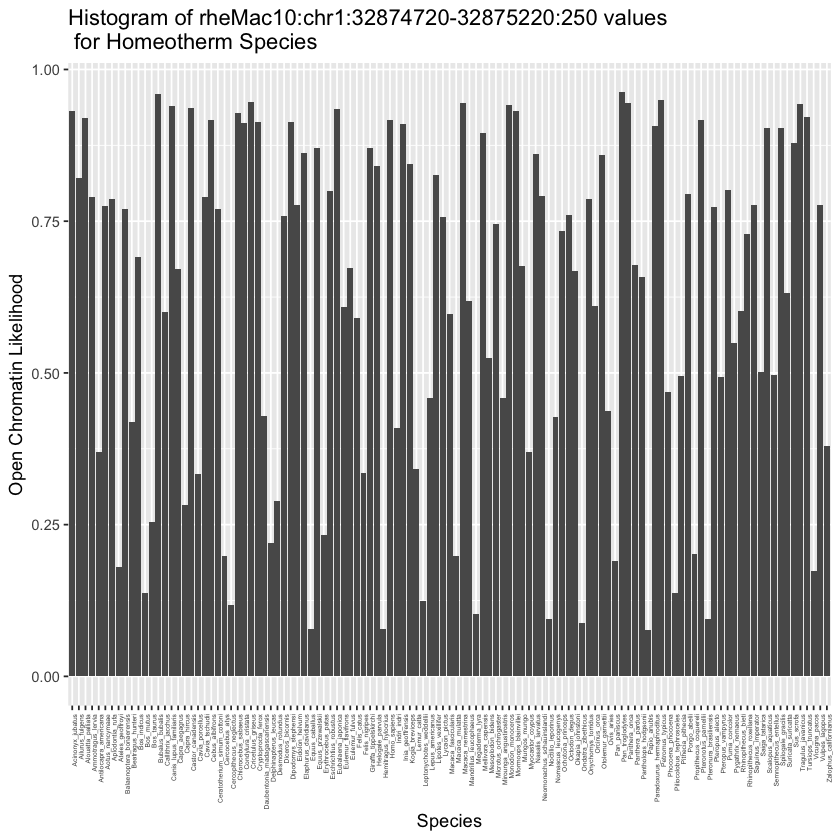

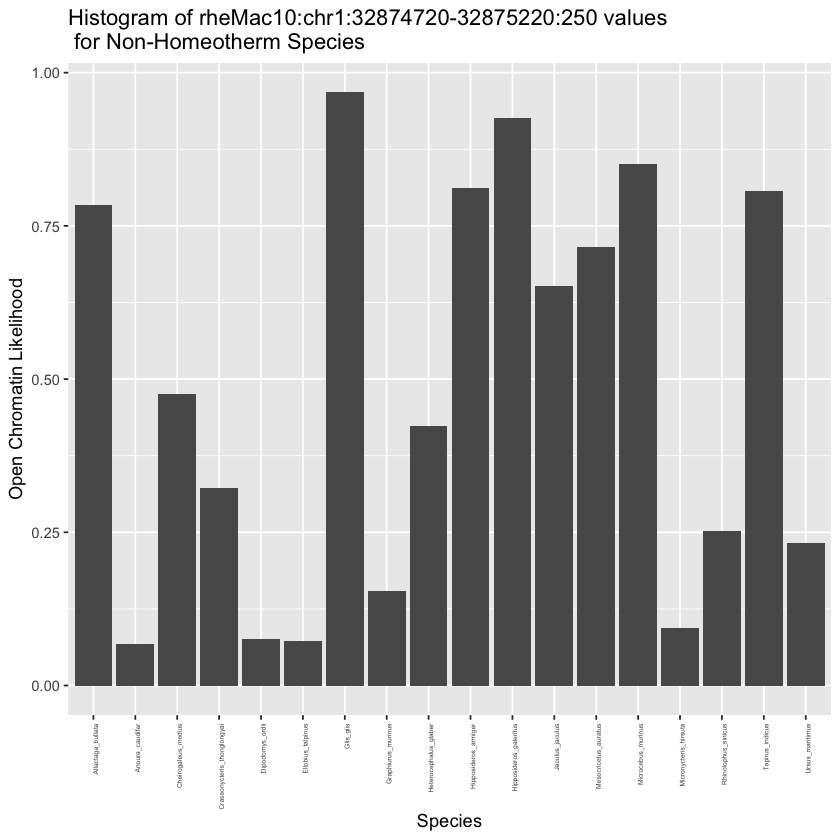

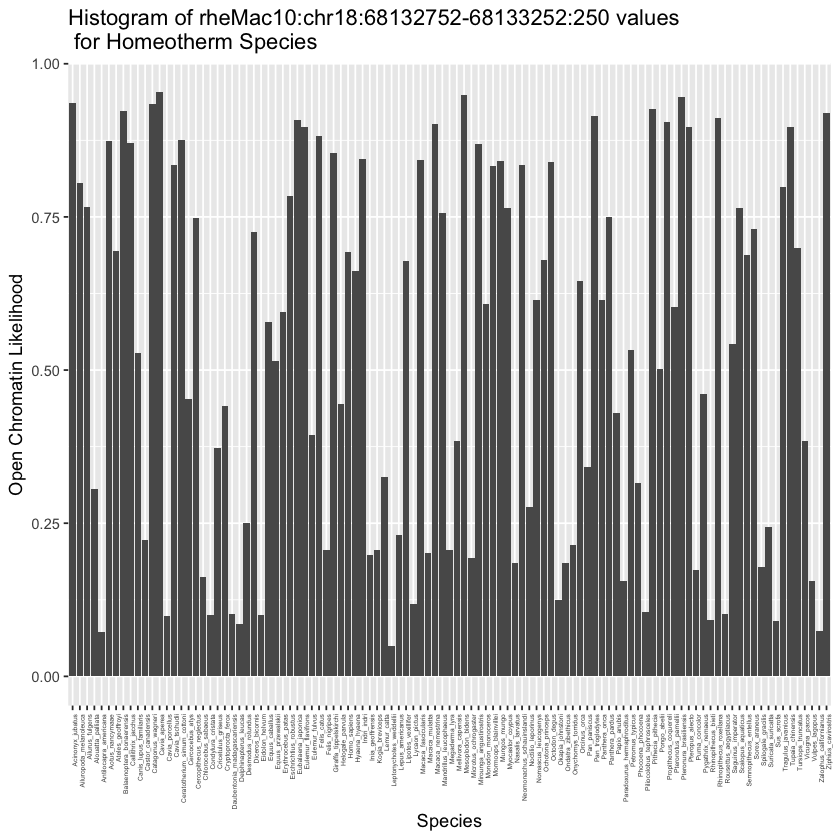

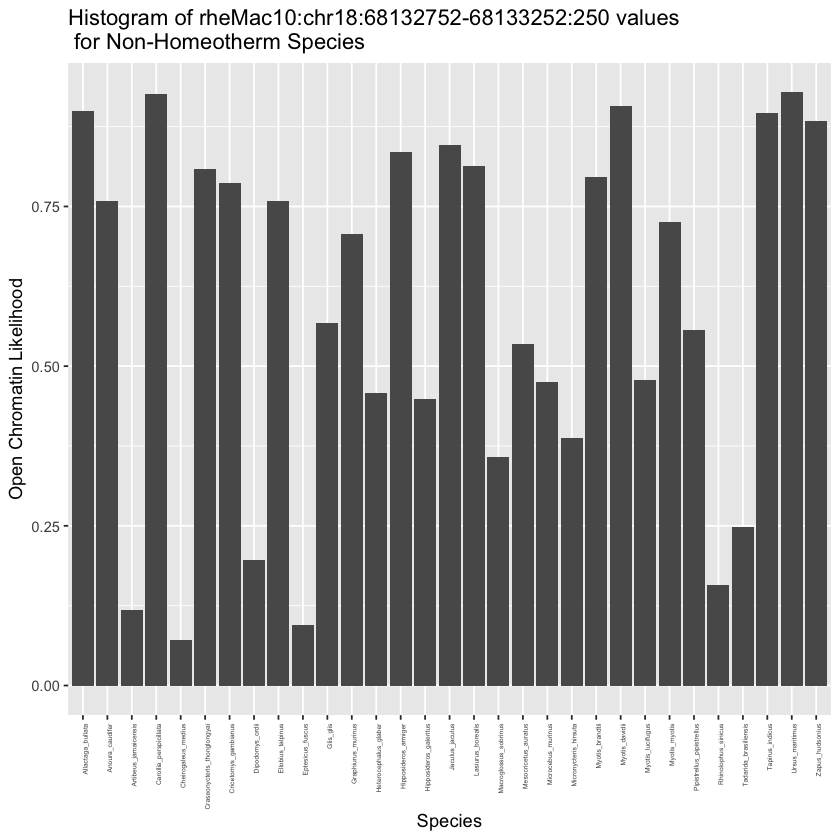

In [59]:
for (peak in astrocyte_peaks){
    idx <- match(peak, colnames(astrocytePredictions))
    small_astrocytePredictions <- astrocytePredictions[idx]
    small_astrocytePredictions$Species <- rownames(small_astrocytePredictions)
    colnames(small_astrocytePredictions) <- c("Value", "Species")
    small_astrocytePredictions$Value <- as.numeric(small_astrocytePredictions$Value)
    small_astrocytePredictions <- small_astrocytePredictions[small_astrocytePredictions$Value >= 0,]
    small_astrocytePredictions_homeo <- small_astrocytePredictions[small_astrocytePredictions$Species %in% homeotherm_species,] 
    my_plot_homeo <- ggplot(small_astrocytePredictions_homeo, aes(x = Species, y = Value)) +
                        geom_bar(stat = "identity") +
                        theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                        labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values \n for Homeotherm Species"))
    print(my_plot_homeo)
    small_astrocytePredictions_nonhomeo <- small_astrocytePredictions[small_astrocytePredictions$Species %in% nonhomeotherm_species,] 
    my_plot_nonhomeo <- ggplot(small_astrocytePredictions_nonhomeo, aes(x = Species, y = Value)) +
                        geom_bar(stat = "identity") +
                        theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                        labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values \n for Non-Homeotherm Species"))
    print(my_plot_nonhomeo) 
}

In [33]:
# Filter the rows where adjCorrelation is positive and negative
positive_adj_corr <- vip_combined[vip_combined$adjCorrelation > 0, ]
negative_adj_corr <- vip_combined[vip_combined$adjCorrelation < 0, ]

# Find the row with the lowest p-value among the positive adjCorrelation
most_pos_assoc_peak <- positive_adj_corr[which.min(positive_adj_corr$pvalue), ]

# Find the row with the lowest p-value among the negative adjCorrelation
most_neg_assoc_peak <- negative_adj_corr[which.min(negative_adj_corr$pvalue), ]

# Print the results
print("Most positively associated peak VIP:")
print(most_pos_assoc_peak)

print("Most negatively associated peak VIP:")
print(most_neg_assoc_peak)

[1] "Most positively associated peak VIP:"
                                   peakId       pvalue correlation
6041 rheMac10:chr16:31250520-31251020:250 6.674739e-28   0.5261444
     adjCorrelation adjusted_pvalue
6041      0.5232012    7.105259e-24
[1] "Most negatively associated peak VIP:"
                            peakId    pvalue correlation adjCorrelation
2657 hg38:chr1:156055029-156055530 0.3191382 0.006164526  -8.364814e-06
     adjusted_pvalue
2657       0.4093636


In [34]:
vip_peaks <- c(most_pos_assoc_peak$peakId, most_neg_assoc_peak$peakId)

Warning message:
"Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 60 rows containing missing values or values outside the scale range
(`geom_point()`)."


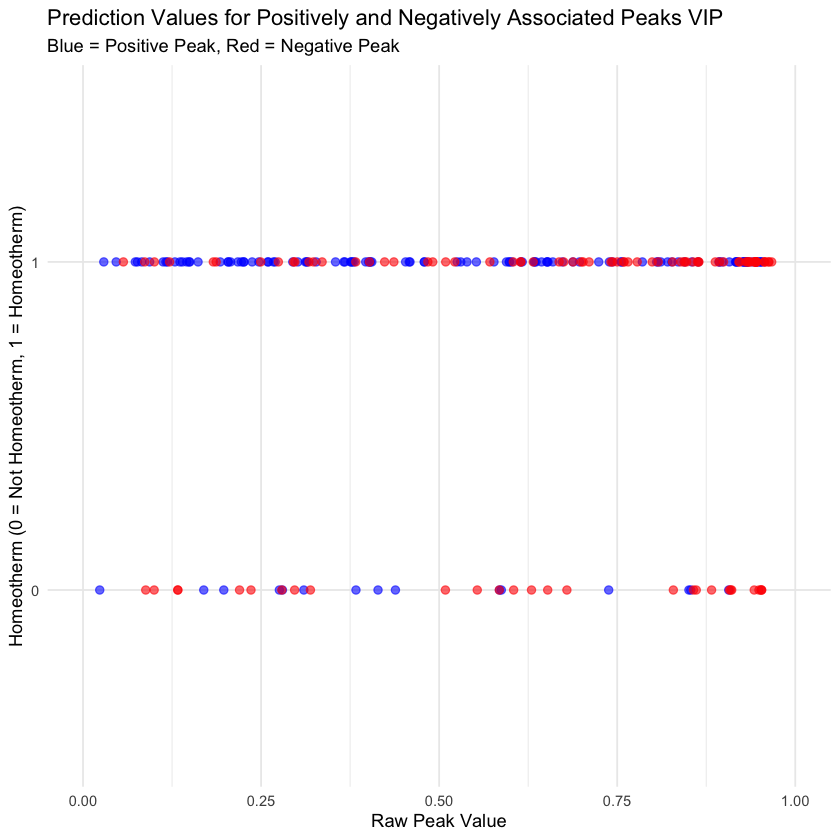

In [35]:
indices <- match(vip_peaks, colnames(vipPredictions))
subset_vip <- vipPredictions[,indices]
subset_vip$Homeotherm <- vipPredictionsNames$Homeotherm

colnames(subset_vip) <- c("Positive_Peak", "Negative_Peak", "Homeotherm")
subset_vip$Homeotherm <- as.factor(subset_vip$Homeotherm)
subset_vip$Positive_Peak <- as.numeric(subset_vip$Positive_Peak)
subset_vip$Negative_Peak <- as.numeric(subset_vip$Negative_Peak)

plot <- ggplot(subset_vip, aes(x = Positive_Peak, y = Homeotherm)) +
  geom_point(color = "blue", alpha = 0.6, size = 2) +
  geom_point(aes(x = Negative_Peak), color = "red", alpha = 0.6, size = 2) +
  scale_x_continuous(limits = c(0, 1), name = "Raw Peak Value") +
  scale_y_discrete(name = "Homeotherm (0 = Not Homeotherm, 1 = Homeotherm)") +
  labs(title = "Prediction Values for Positively and Negatively Associated Peaks VIP",
       subtitle = "Blue = Positive Peak, Red = Negative Peak") +
  theme_minimal()

print(plot)

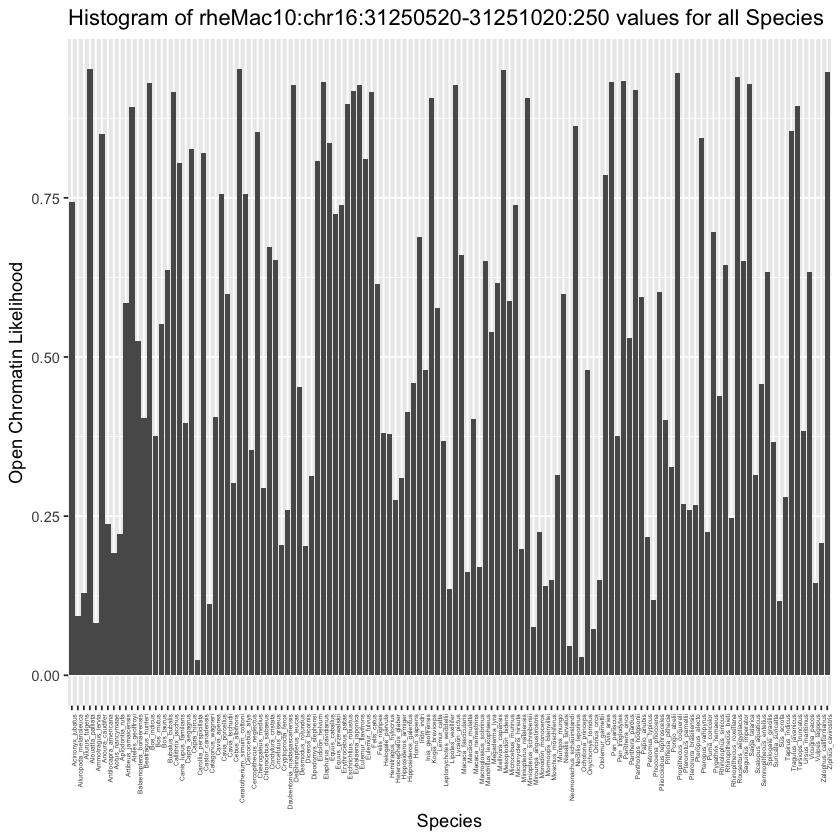

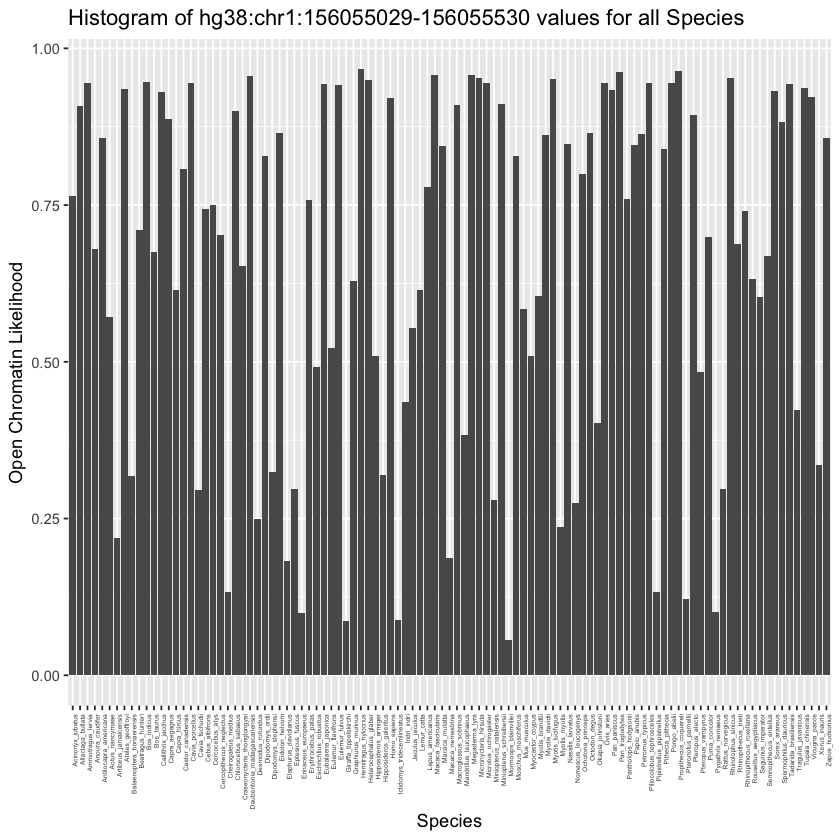

In [60]:
for (peak in vip_peaks){
    idx <- match(peak, colnames(vipPredictions))
    small_vipPredictions <- vipPredictions[idx]
    small_vipPredictions$Species <- rownames(small_vipPredictions)
    colnames(small_vipPredictions) <- c("Value", "Species")
    small_vipPredictions$Value <- as.numeric(small_vipPredictions$Value)
    small_vipPredictions <- small_vipPredictions[small_vipPredictions$Value >= 0,]
    my_plot <- ggplot(small_vipPredictions, aes(x = Species, y = Value)) +
                geom_bar(stat = "identity") +
                theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for all Species"))
    print(my_plot)    
}

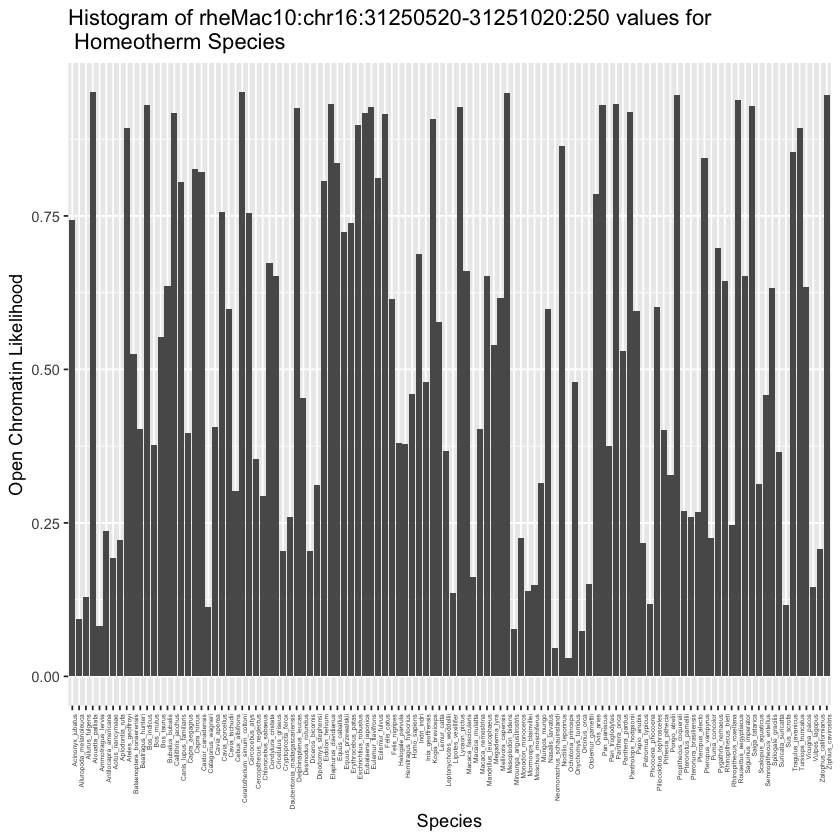

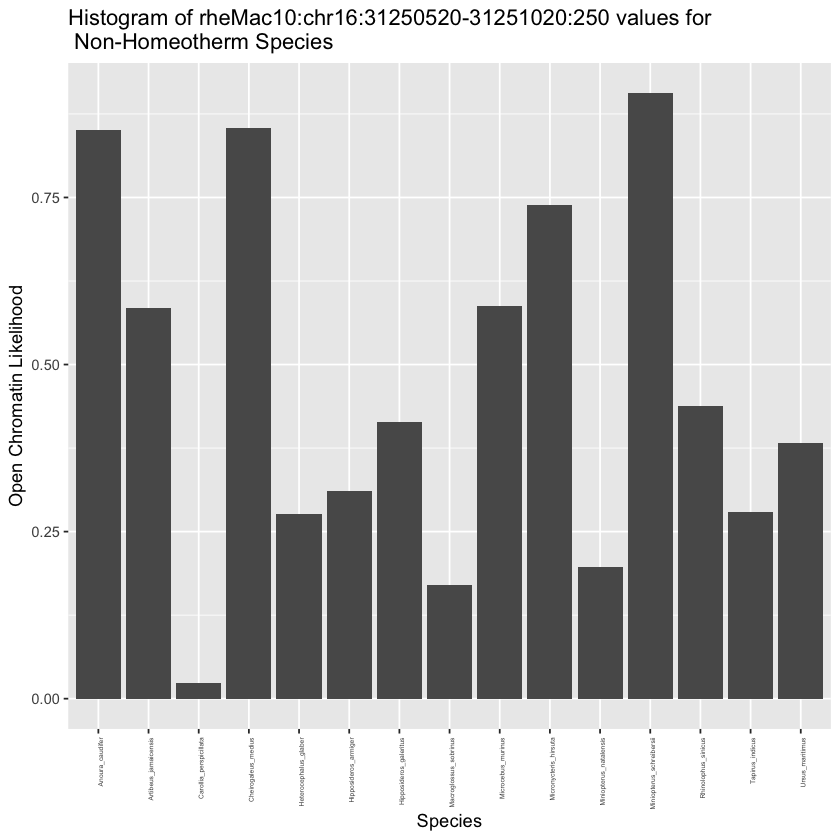

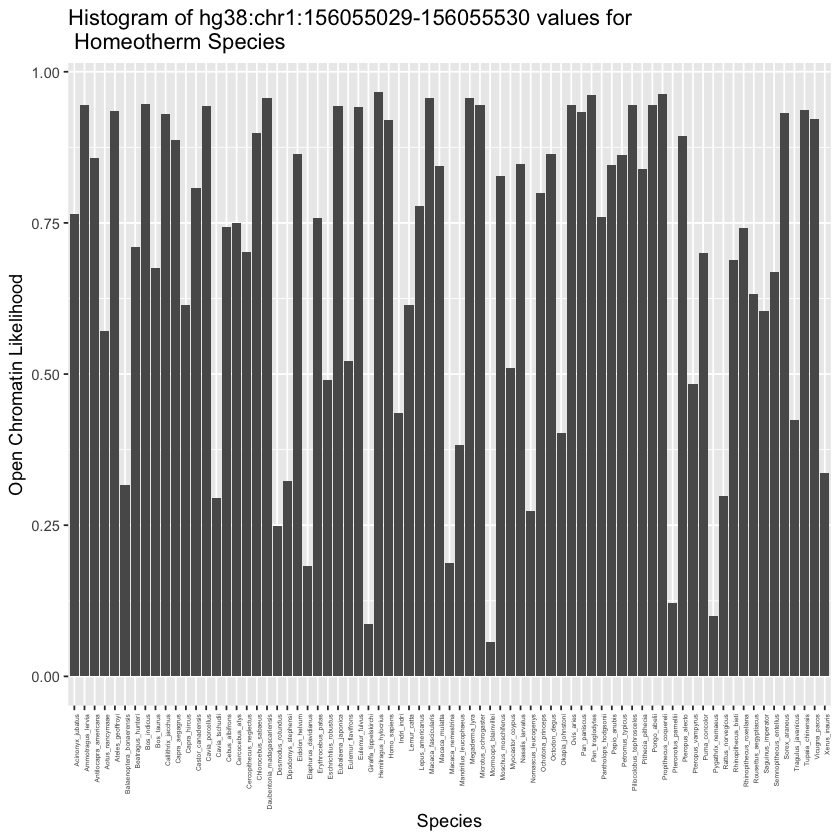

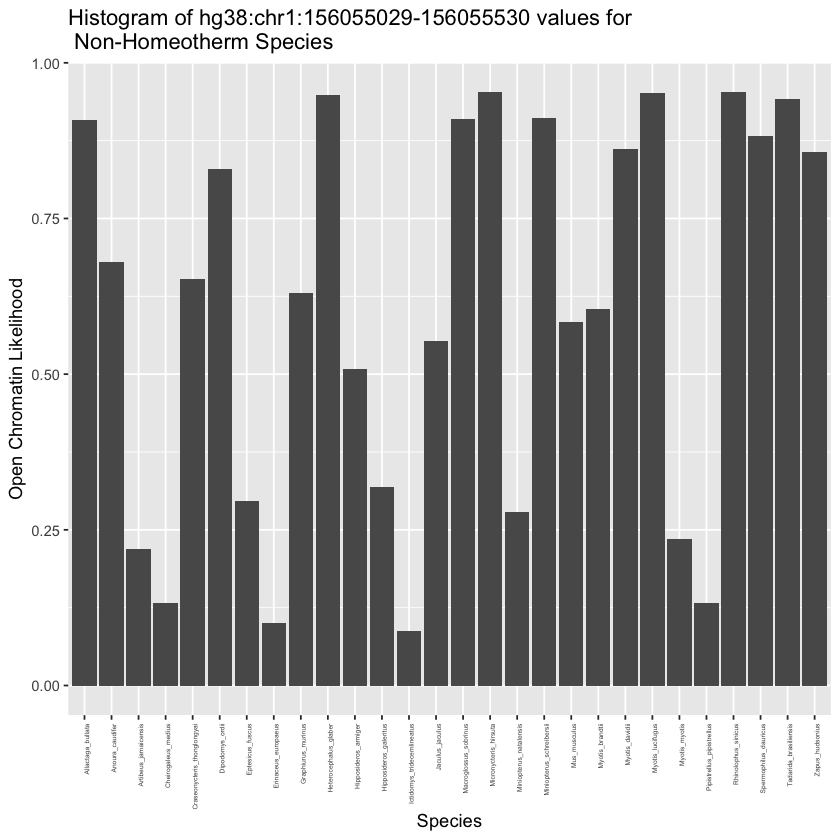

In [62]:
for (peak in vip_peaks){
    idx <- match(peak, colnames(vipPredictions))
    small_vipPredictions <- vipPredictions[idx]
    small_vipPredictions$Species <- rownames(small_vipPredictions)
    colnames(small_vipPredictions) <- c("Value", "Species")
    small_vipPredictions$Value <- as.numeric(small_vipPredictions$Value)
    small_vipPredictions <- small_vipPredictions[small_vipPredictions$Value >= 0,]
    small_vipPredictions_homeo <- small_vipPredictions[small_vipPredictions$Species %in% homeotherm_species,] 
    my_plot_homeo <- ggplot(small_vipPredictions_homeo, aes(x = Species, y = Value)) +
                        geom_bar(stat = "identity") +
                        theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                        labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for \n Homeotherm Species"))
    print(my_plot_homeo)
    small_vipPredictions_nonhomeo <- small_vipPredictions[small_vipPredictions$Species %in% nonhomeotherm_species,] 
    my_plot_nonhomeo <- ggplot(small_vipPredictions_nonhomeo, aes(x = Species, y = Value)) +
                        geom_bar(stat = "identity") +
                        theme(axis.text.x = element_text(size = 4, angle = 90, hjust = 1)) +
                        labs(x = "Species", y = "Open Chromatin Likelihood", title = paste("Histogram of", peak, "values for \n Non-Homeotherm Species"))
    print(my_plot_nonhomeo) 
}

**GREAT ANALYSIS**

In [40]:
top_200_positiveAstro <- astrocyte_combined[astrocyte_combined$adjCorrelation > 0, ][order(astrocyte_combined$pvalue[astrocyte_combined$adjCorrelation > 0]), ][1:200, ]
top_200_negativeAstro <- astrocyte_combined[astrocyte_combined$adjCorrelation < 0, ][order(astrocyte_combined$pvalue[astrocyte_combined$adjCorrelation < 0]), ][1:200, ]

In [46]:
extract_bed_info <- function(peakId) {
  split_info <- strsplit(peakId, ":|-")[[1]] # Split by : and -
  chr <- split_info[2]   # Chromosome
  start <- split_info[3] # Start position
  stop <- split_info[4]  # End position
  return(c(chr, start, stop))
}

In [47]:
# Apply this function to both positive and negative data
top_200_positive_bedAstro <- t(apply(top_200_positiveAstro, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedAstro <- t(apply(top_200_negativeAstro, 1, function(x) extract_bed_info(x['peakId'])))

In [48]:
# Add peakId to the BED information
top_200_positive_bedAstro <- data.frame(top_200_positive_bedAstro, peakId = top_200_positiveAstro$peakId)
top_200_negative_bedAstro <- data.frame(top_200_negative_bedAstro, peakId = top_200_negativeAstro$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedAstro) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedAstro, file = "Bed_Files/top_200_positive_peaksAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(top_200_negative_bedAstro, file = "Bed_Files/top_200_negative_peaksAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [49]:
# Extract all peaks
all_peaks_bedAstro <- t(apply(astrocyte_combined, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedAstro <- data.frame(all_peaks_bedAstro, peakId = astrocyte_combined$peakId)

# Rename columns for BED format
colnames(all_peaks_bedAstro) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedAstro, file = "Bed_Files/all_peaks_cell_typeAstro.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [50]:
top_200_positiveVIP <- vip_combined[vip_combined$adjCorrelation > 0, ][order(vip_combined$pvalue[vip_combined$adjCorrelation > 0]), ][1:200, ]
top_200_negativeVIP <- vip_combined[vip_combined$adjCorrelation < 0, ][order(vip_combined$pvalue[vip_combined$adjCorrelation < 0]), ][1:200, ]

In [51]:
top_200_positive_bedVIP <- t(apply(top_200_positiveVIP, 1, function(x) extract_bed_info(x['peakId'])))
top_200_negative_bedVIP <- t(apply(top_200_negativeVIP, 1, function(x) extract_bed_info(x['peakId'])))

In [53]:
# Add peakId to the BED information
top_200_positive_bedVIP <- data.frame(top_200_positive_bedVIP, peakId = top_200_positiveVIP$peakId)
top_200_negative_bedVIP <- data.frame(top_200_negative_bedVIP, peakId = top_200_negativeVIP$peakId)

# Rename the columns to match BED format
colnames(top_200_positive_bedVIP) <- c("chr", "start", "stop", "peakId")
colnames(top_200_negative_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to BED files
write.table(top_200_positive_bedVIP, file = "Bed_Files/top_200_positive_peaksVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(top_200_negative_bedVIP, file = "Bed_Files/top_200_negative_peaksVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [54]:
# Extract all peaks
all_peaks_bedVIP <- t(apply(vip_combined, 1, function(x) extract_bed_info(x['peakId'])))
all_peaks_bedVIP <- data.frame(all_peaks_bedVIP, peakId = vip_combined$peakId)

# Rename columns for BED format
colnames(all_peaks_bedVIP) <- c("chr", "start", "stop", "peakId")

# Write to a BED file for all peaks
write.table(all_peaks_bedVIP, file = "Bed_Files/all_peaks_cell_typeVIP.bed", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)